![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
workout_data = pd.read_csv('data/workout.csv')
print("-- Global informations about the data --\n")
print(workout_data.info())
peak_index = workout_data['workout_worldwide'].idxmax()
peak_date = workout_data.loc[peak_index, 'month']
year_str = peak_date[0:4]
print("\n----------------------------------")
print("* Peak global workout year:", year_str)

-- Global informations about the data --

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month              61 non-null     object
 1   workout_worldwide  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

----------------------------------
* Peak global workout year: 2020


-- Global informations about the data --

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   month                   61 non-null     object
 1   home_workout_worldwide  61 non-null     int64 
 2   gym_workout_worldwide   61 non-null     int64 
 3   home_gym_worldwide      61 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB
None


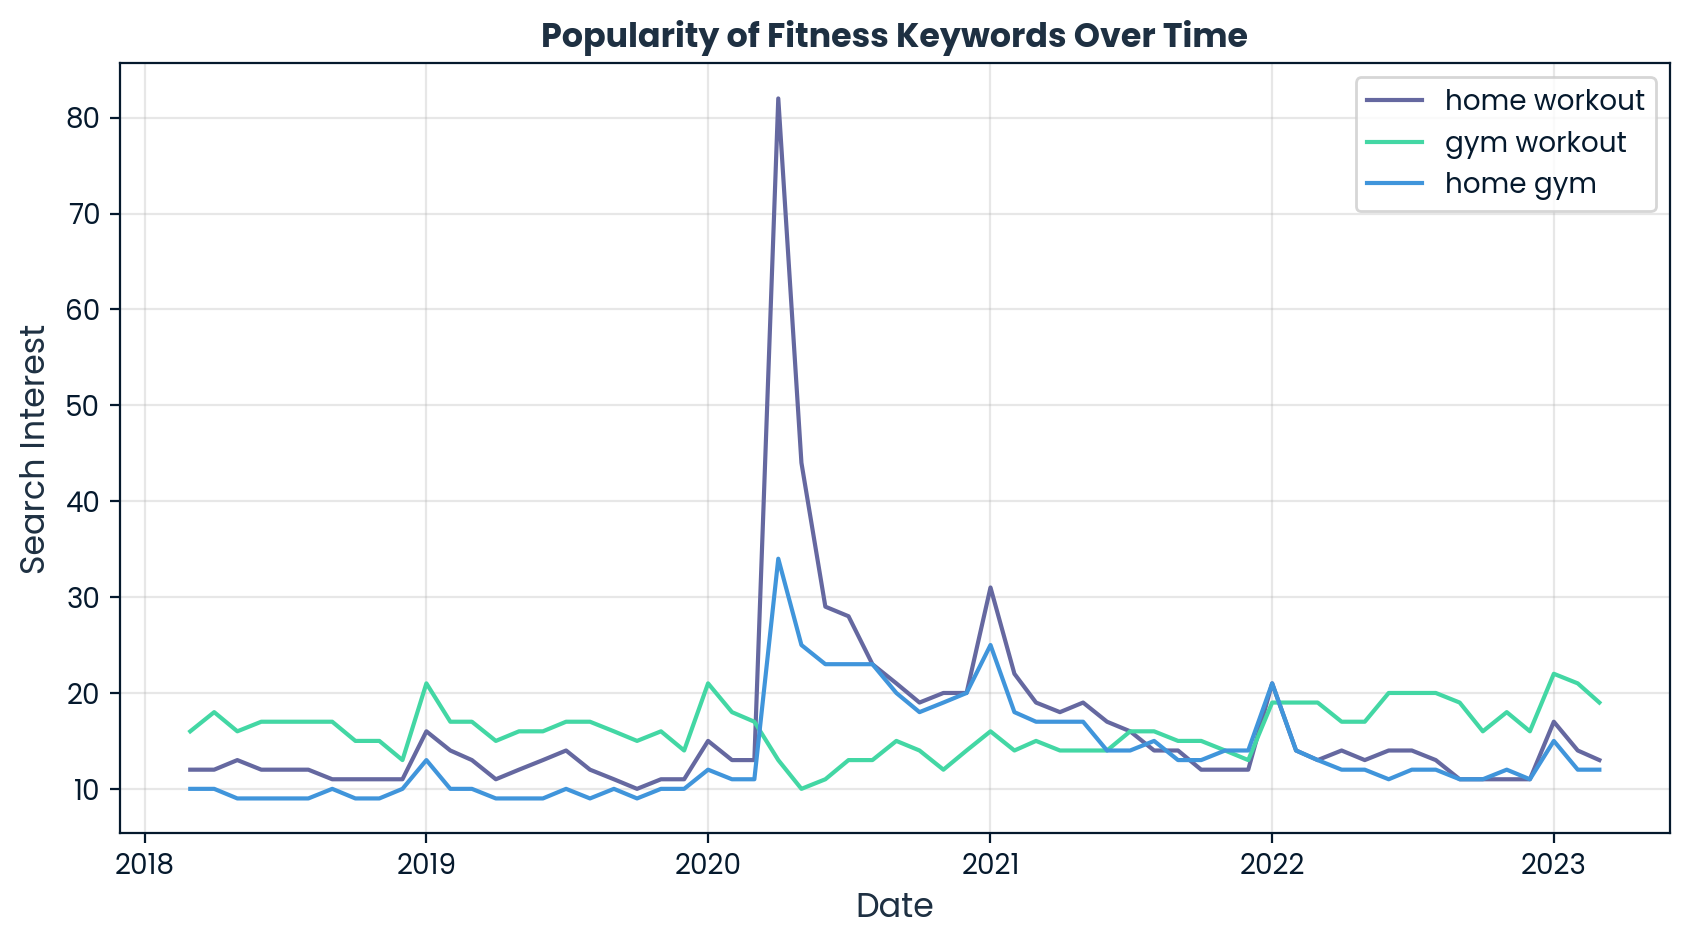

-- Most Popular Keywords --

* Peak during covid: home_workout
* Current most popular: gym_workout


In [195]:
keywords_data = pd.read_csv('data/three_keywords.csv')
print("-- Global informations about the data --\n")
print(keywords_data.info())
keywords_data['month'] = pd.to_datetime(keywords_data['month'])
fig, ax = plt.subplots(figsize= (10,5))
ax.plot(keywords_data['month'], keywords_data['home_workout_worldwide'], label='home workout')
ax.plot(keywords_data['month'], keywords_data['gym_workout_worldwide'], label='gym workout')
ax.plot(keywords_data['month'], keywords_data['home_gym_worldwide'], label='home gym')
ax.set_title("Popularity of Fitness Keywords Over Time", fontsize=12, alpha=0.9, weight= 'bold')
ax.set_xlabel("Date", fontsize=12, alpha=0.9)
ax.set_ylabel("Search Interest", fontsize=12, alpha=0.9)
ax.grid(True, alpha=0.3)
plt.legend()
plt.show()

peak_covid = 'home_workout'
current = 'gym_workout'

print("-- Most Popular Keywords --\n")
print("* Peak during covid:", peak_covid)
print("* Current most popular:", current)

In [196]:
geo_data = pd.read_csv('data/workout_geo.csv')
print("-- Check for NaN values --\n")
print(geo_data.isna().sum())
geo_data = geo_data.fillna(0)
top_country_index = geo_data['workout_2018_2023'].idxmax()
top_country = geo_data.loc[top_country_index, 'country']
print("\n----------------------------------")
print("* Top country globally:", top_country)

-- Check for NaN values --

country                0
workout_2018_2023    189
dtype: int64

----------------------------------
* Top country globally: United States


In [197]:
keywords_geo = pd.read_csv('data/three_keywords_geo.csv')
print("-- Check for NaN values --\n")
print(keywords_geo.isna().sum())
keywords_geo = keywords_geo.fillna(0)
MESA = [
    'Philippines','Malaysia','Qatar','United Arab Emirates','Egypt','Saudi Arabia',
    'Kuwait','Jordan','Israel','Iran','India','Pakistan','Sri Lanka','Bangladesh',
    'Thailand','Vietnam','Indonesia','Myanmar (Burma)','Turkey','Iraq'
]

mesa_filtered = keywords_geo[keywords_geo['Country'].isin(MESA)][['Country','home_workout_2018_2023']]

peak_index_mesa = mesa_filtered['home_workout_2018_2023'].idxmax()
home_workout_geo = mesa_filtered.loc[peak_index_mesa, 'Country']
print("\n----------------------------------")
print("* Top home workout country in MESA:", home_workout_geo)

-- Check for NaN values --

Country                     0
home_workout_2018_2023    203
gym_workout_2018_2023     203
home_gym_2018_2023        203
dtype: int64

----------------------------------
* Top home workout country in MESA: Iran
